<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/15_anomaly_detection/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2025-02-14 15:42:27--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 172.253.63.138, 172.253.63.139, 172.253.63.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2025-02-14 15:42:27--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.122.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)

In [ ]:
df = pd.read_csv('./E-commerce.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [ ]:
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.drop('ID',axis=1,inplace=True)

In [ ]:
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [ ]:
std_df = pd.DataFrame(std_df,columns=df.columns)

std_df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,-1.495250,-0.758535,-1.054611,-0.732800,0.323118,0.339192
1,0.720691,-1.247488,-0.690292,-0.786002,0.272672,-0.310034
2,0.597285,0.193635,-0.246428,0.935872,0.464365,2.077120
3,1.573801,-0.295317,-0.213449,0.947616,-0.534456,-0.010392
4,-1.006992,-0.269583,-1.083008,-0.665697,0.424009,0.578906


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

components = pca.fit_transform(std_df)

x = components[:,0]
y = components[:,1]

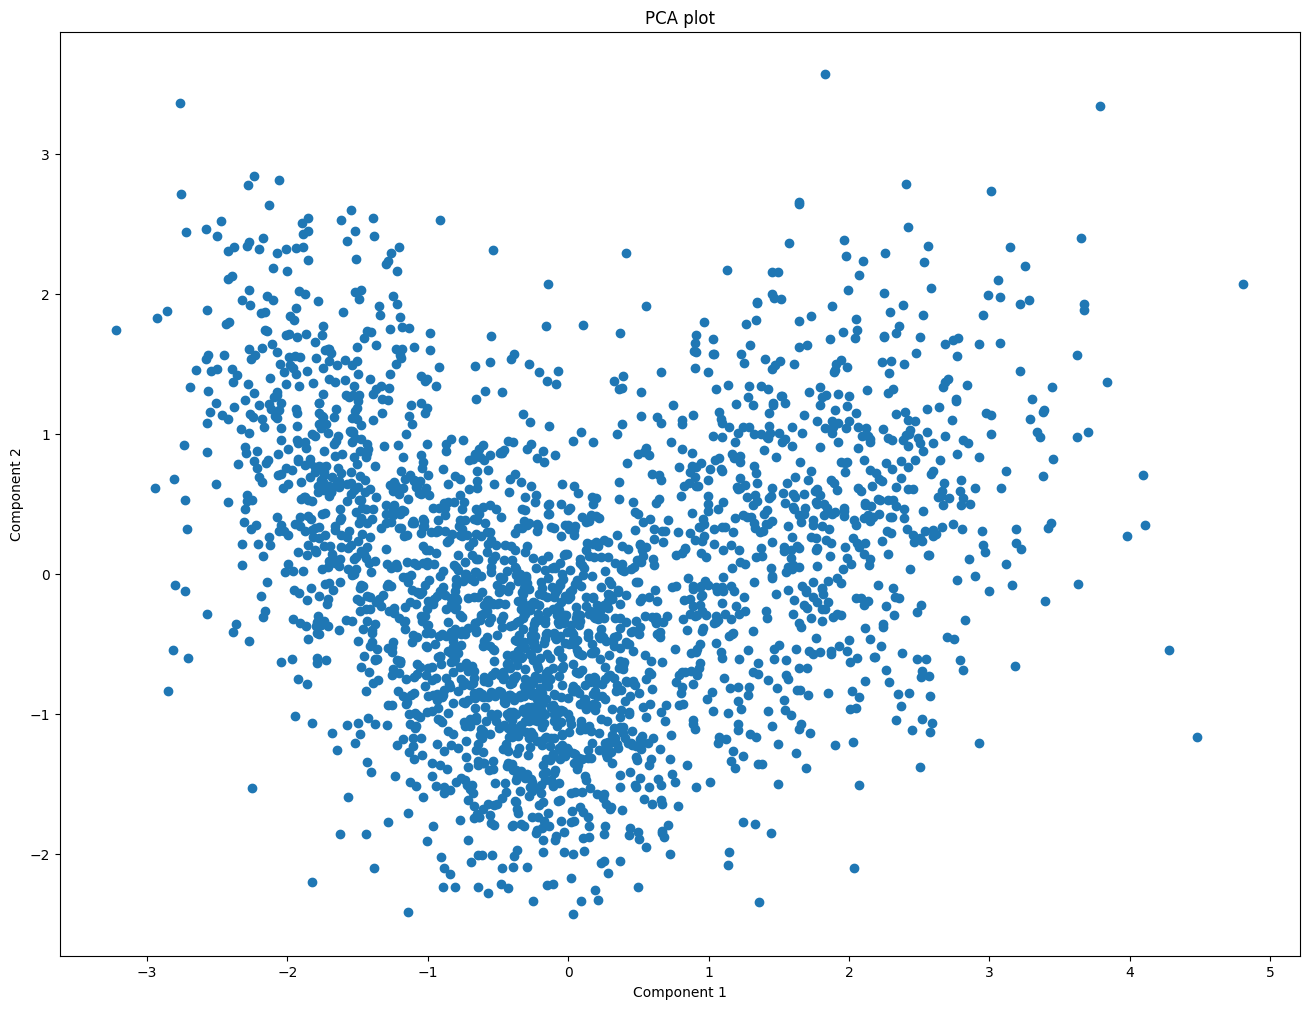

In [ ]:
plt.scatter(x,y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA plot")
plt.show()

In [ ]:
import time


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
start = time.time()
dbsc = DBSCAN(eps = 0.9, min_samples = 15).fit(std_df)
end = time.time()

In [ ]:
end-start

0.07557964324951172

In [ ]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0, -1, ..., -1,  0, -1])

In [ ]:
out_df = std_df.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()


,count
label,
0,1370
-1,1042
1,47
2,27
3,14


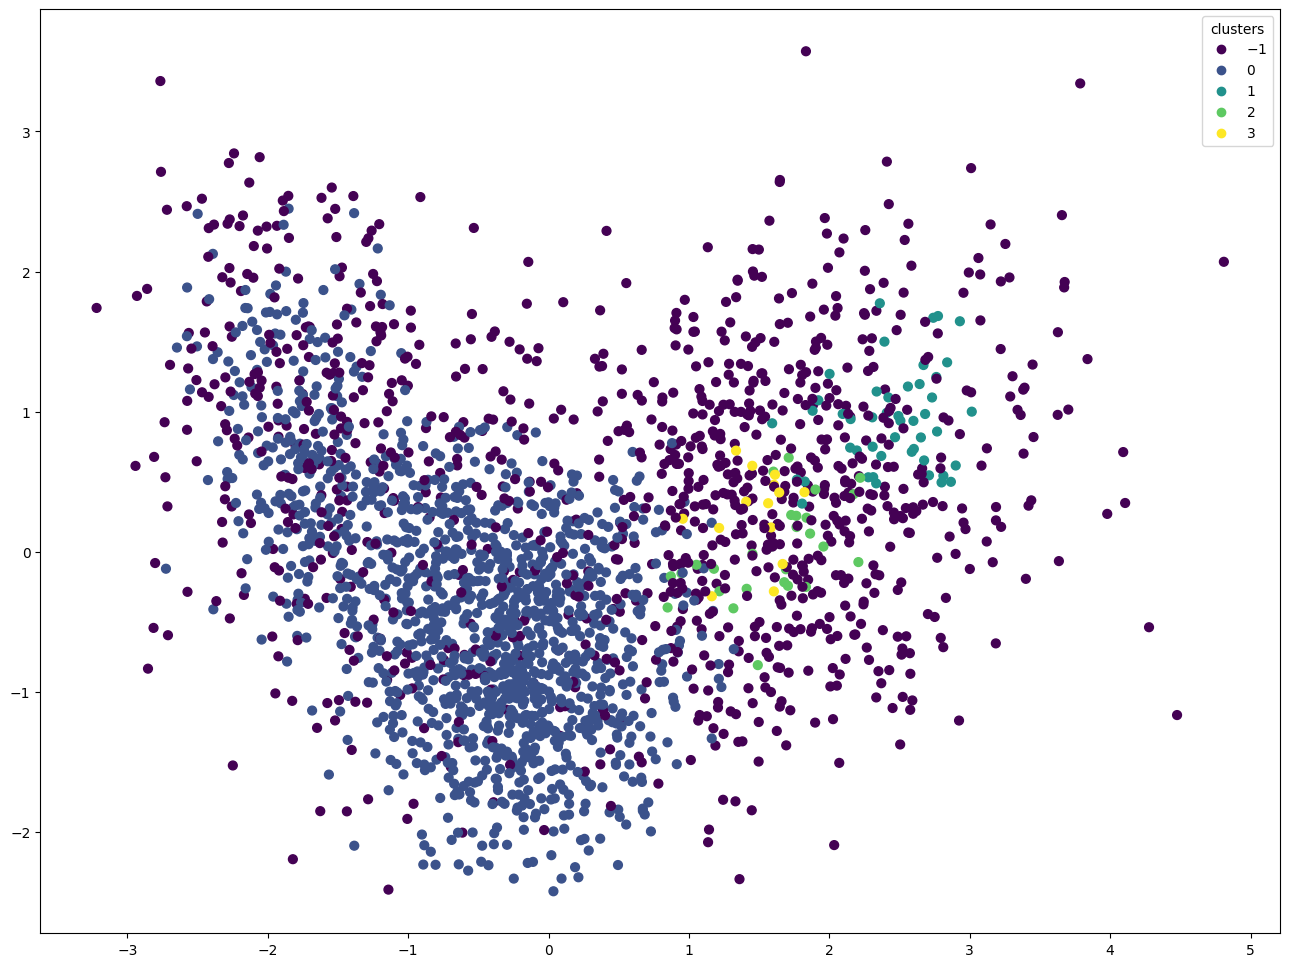

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(x,y,s=40,c=out_df['label'],cmap='viridis')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(std_df)

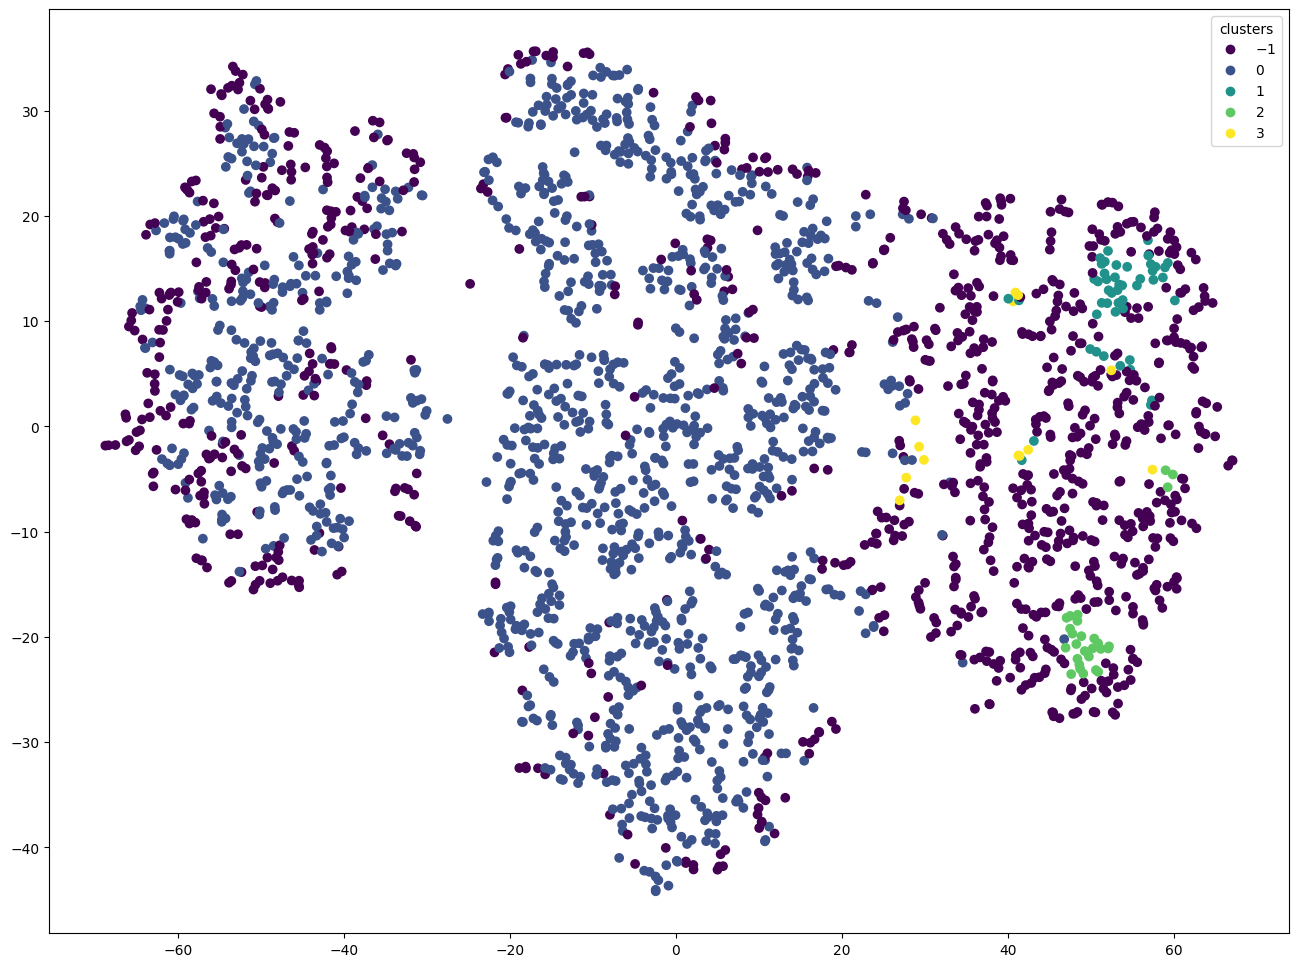

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=out_df['label'],cmap='viridis')
ax.legend(*sc.legend_elements(), title='clusters')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print('Silhouette Score for DBSCAN:',silhouette_score(std_df,dbsc.labels_))


Silhouette Score for DBSCAN: -0.07089778284732577


In [ ]:
print("Time taken by DBSCAN:",end-start)

Time taken by DBSCAN: 0.07557964324951172
